# Analyse Exploratoire du fichier myreport_sql_lock_full.csv

### Imports (fichier & modules)

In [2]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [3]:
tab = pda.read_csv('../data/logServer/myreport_sql_lock_full.csv', sep=',', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

### Le fichier myreport_sql_lock_full.csv

In [4]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  12  colonnes dans le data frame


In [5]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)',
       'Nombre de requêtes de verrouillage/s',
       'Nombre de requêtes de verrouillage/s(RAW)', 'Temps d'attente moyen',
       'Temps d'attente moyen(RAW)', 'Nombre de blocages/s',
       'Nombre de blocages/s(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [6]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date et heure                              2882 non-null   object 
 1   Date et heure(RAW)                         2881 non-null   float64
 2   Nombre de requêtes de verrouillage/s       2195 non-null   object 
 3   Nombre de requêtes de verrouillage/s(RAW)  2194 non-null   float64
 4   Temps d'attente moyen                      2195 non-null   object 
 5   Temps d'attente moyen(RAW)                 2194 non-null   float64
 6   Nombre de blocages/s                       2192 non-null   object 
 7   Nombre de blocages/s(RAW)                  2194 non-null   float64
 8   Temps mort                                 2195 non-null   object 
 9   Temps mort(RAW)                            2194 non-null   float64
 10  Couverture              

In [7]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                                2882
Date et heure(RAW)                           2881
Nombre de requêtes de verrouillage/s         1122
Nombre de requêtes de verrouillage/s(RAW)    2194
Temps d'attente moyen                         305
Temps d'attente moyen(RAW)                    471
Nombre de blocages/s                            1
Nombre de blocages/s(RAW)                       2
Temps mort                                      1
Temps mort(RAW)                                 1
Couverture                                      3
Couverture(RAW)                                 2
dtype: int64


In [8]:
tab.head()


,Date et heure,Date et heure(RAW),Nombre de requêtes de verrouillage/s,Nombre de requêtes de verrouillage/s(RAW),Temps d'attente moyen,Temps d'attente moyen(RAW),Nombre de blocages/s,Nombre de blocages/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,708 #,708.1192,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,56 #,56.1687,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,142 #,142.3510,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0


## Analyse temporelle

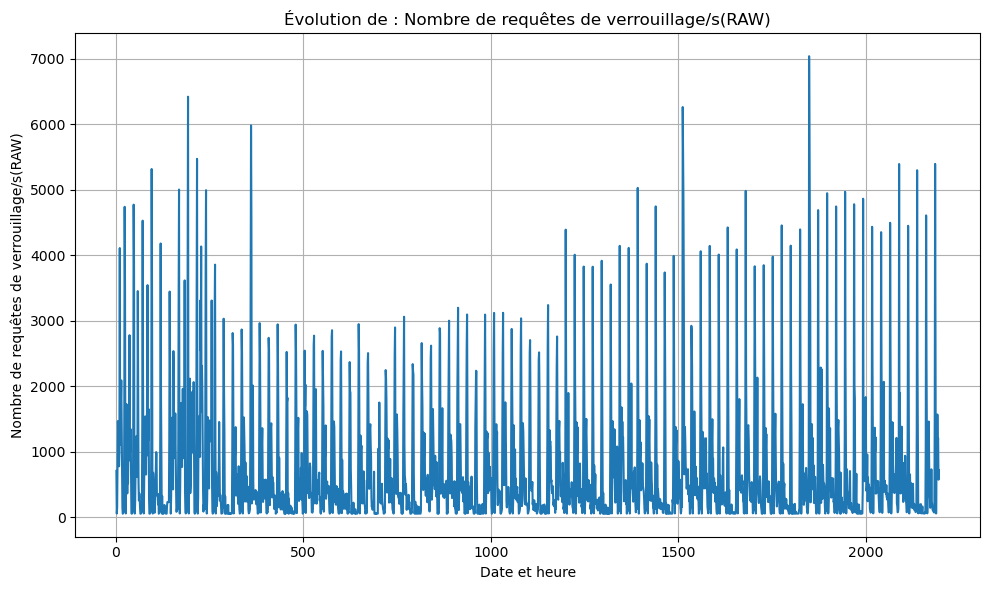

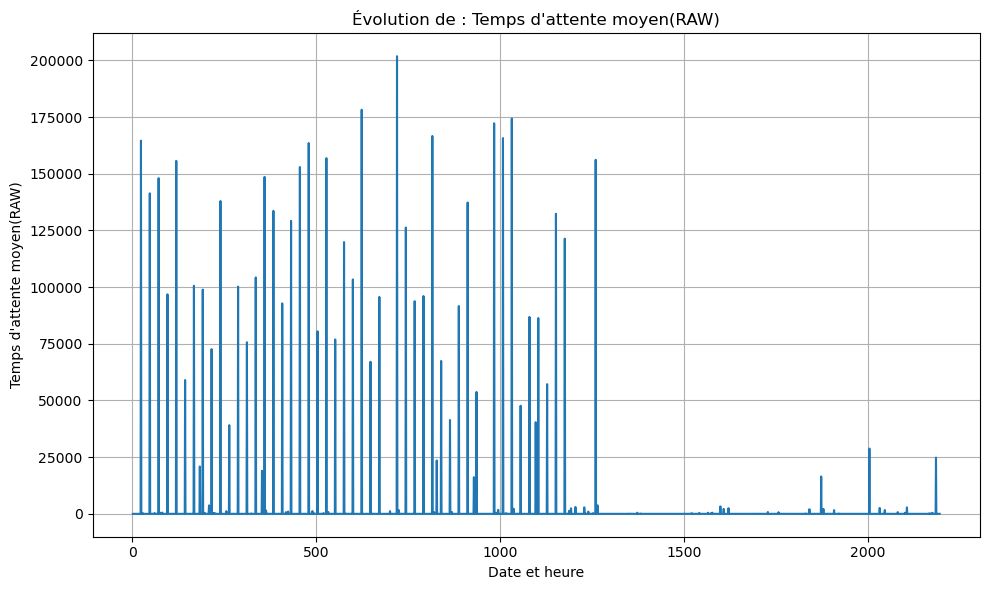

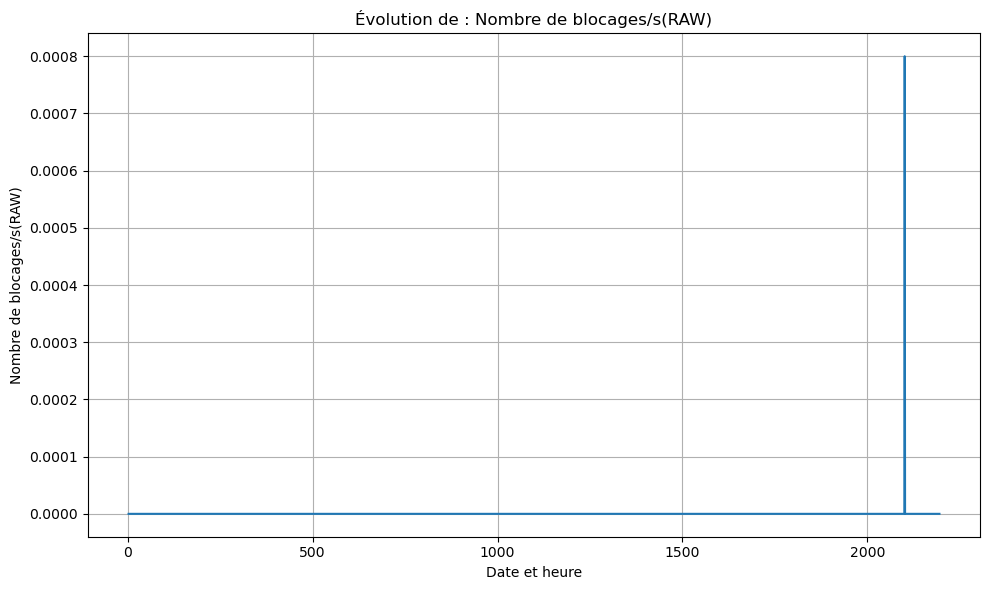

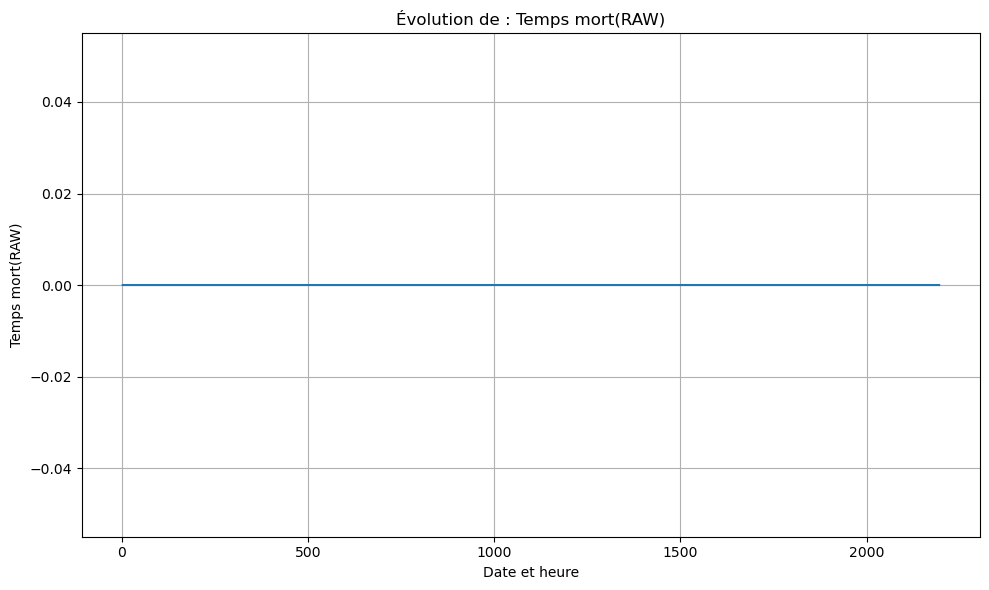

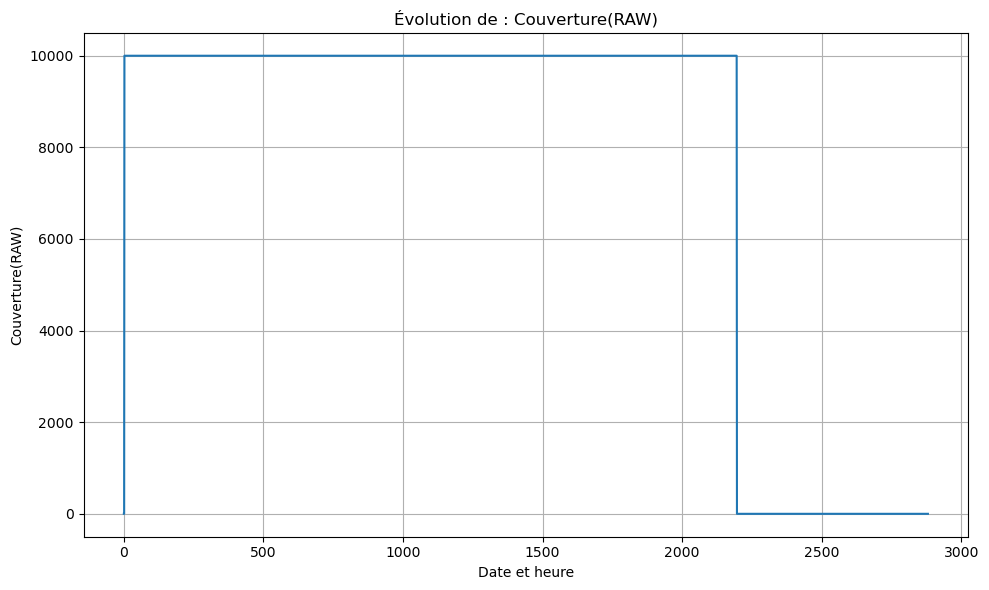

In [9]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()